# IPCV: Filter - Übung 2
---


Übung von: Remo Schwarzentruber

## Imports & Settings

In [2]:
from matplotlib.pyplot import *
import numpy as np
import cv2
rcParams['figure.dpi'] = 200

# Aufgabe 1: Separierbare FIlter

Zeigen Sie, dass der Mittelwertfilter x-/y-separierbar ist, wobei
\begin{align*}
  M_1 = \frac{1}{3}\begin{bmatrix}1 & 1 & 1\end{bmatrix}\qquad&\mathrm{und}\qquad
  M_2 = \frac{1}{3}\begin{bmatrix}1\\ 1\\ 1\end{bmatrix}
\end{align*}
d.h. bilden Sie $M_1 \star M_2$ und vergleichen Sie mit dem
$3\times 3$-Mittelwert-Kernel. Dabei müssen Sie die beiden
Kernels $M_1$ und $M_2$ in beliebiger Reihenfolge falten (es
gilt ja das Kommutativgesetz, d.h. die Reihenfolge hat keinen
Einfluss auf das Resultat).



Lösung: Wird auf dem Silde 5/44 von "Filter II"
behandelt. Zur Kontrolle sollten Sie ein Bild zuerst mit $M_1$
und danach mit $M_2$ filtern. Es sollte dabei exakt (bis auf
numerische Fehler) das selbe rauskommen, wie wenn Sie mit
\begin{align*}
  M_1 \star M_2 &= \frac{1}{9}\begin{bmatrix}
                                1 & 1 & 1\\
                                1 & 1 & 1\\
                                1 & 1 & 1
                              \end{bmatrix}
\end{align*}
filtern.

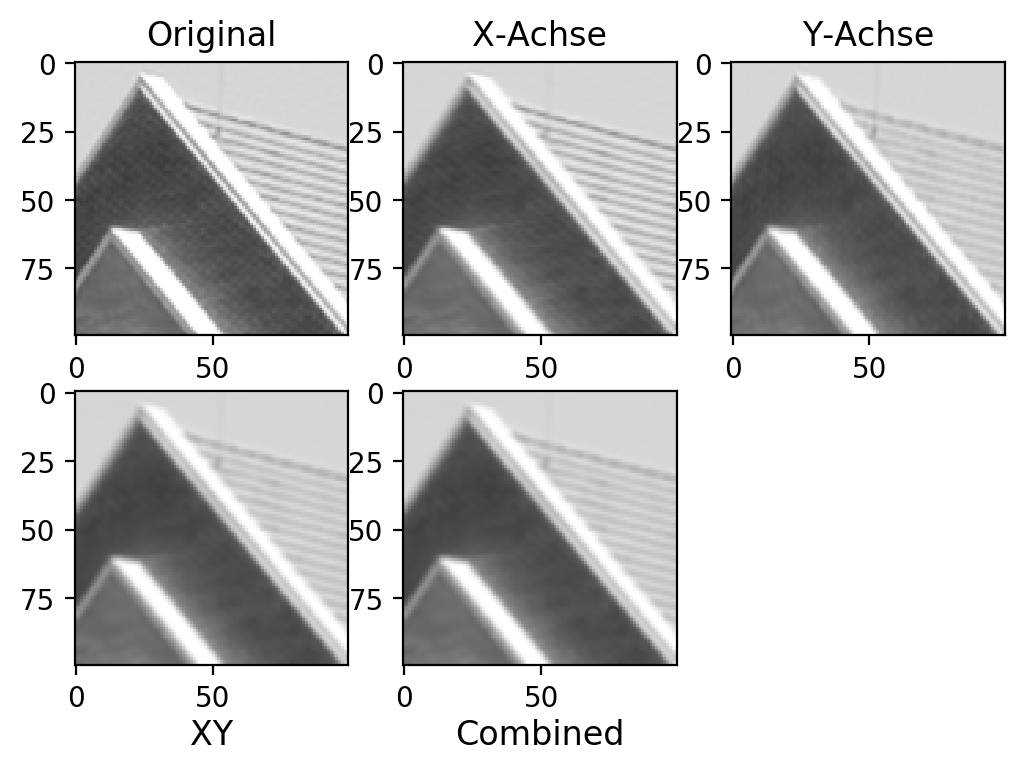

In [3]:
img = cv2.imread("../data/DIP+MatLab-Gonzalesetal-F04.09a.tiff")
croppedImg = img[200:300,200:300]

x = 1/ 3 * np.array([[1, 1, 1]])
y = np.transpose(x)
xy = x * y
M = 1/9 * np.array([(1,1,1),(1,1,1),(1,1,1)])

img_x = cv2.filter2D(croppedImg, -1, x)
img_y = cv2.filter2D(croppedImg, -1, y)
img_xy = cv2.filter2D(croppedImg, -1, xy)
img_M = cv2.filter2D(croppedImg, -1, M)

subplot(2, 3, 1)
title("Original")
imshow(croppedImg)

subplot(2, 3, 2)
title("X-Achse")
imshow(img_x)

subplot(2, 3, 3)
title("Y-Achse")
imshow(img_y)

subplot(2, 3, 4)
title("XY", y=-0.35)
imshow(img_xy)

subplot(2, 3, 5)
title("Combined", y=-0.35)
imshow(img_M)

show()

# Aufgabe 2: Medianfilter ist Shiftinvariant

Für ein 1D-Signal bedeutet Shiftinvarianz des Filters $f$
folgendes. Falls $y_1[n] = f(x_1[n])$, dann gilt
$y_2[n]=f(x_1[n-k])=y_1[n-k]$. 
In Worten: Falls $y_1$ der Output des Filters von $x_1$ ist, dann ist das um $k$ Stellen verschobene $y_1$ der Output des um $k$ Stellen verschobenen $x_1$.

Wir zeigen am Beispiel der Inputfolge $x_1[n]=[\mathbf{4},2,3,1,5,9]$, dass der 1D Medianfilter $w$ der 
Länge $3$ shiftinvariant ist. Wir nehmen $0$-padding an und erhalten

\begin{align*}
  y_1[n] &= f(x_1[n]) \;=\; (w\star x_1)[n] \;=\; [0,\mathbf{2},3,2,3,5,5,0]
\end{align*}

Nun betrachten wir die um $2$ Stellen nach rechts verschobene
Inputfolge $x_2[n]=x_1[n-2]=[0,0,4,2,3,1,5,9]$ und erhalten

\begin{align*}
  y_2[n] &= f(x_2[n]) \;=\; (w\star x_2)[n] \;=\; [\mathbf{0},0,2,3,2,3,5,5,0]
\end{align*}

Wir haben das Sample im Ursprung mit fetten Zeichen dargestellt
und sehen nun, dass $y_2[n]=y_1[n-2]$, dass also die zweite
Outputfolge nichts anderes ist als die erste Outputfolge wenn diese
um zwei Stellen nach rechts geshiftet wird.

Man kann dies einfach auf den 2D-Fall eines Bildes erweitern.
Lesen Sie das Bild des Kamearmannes ein:

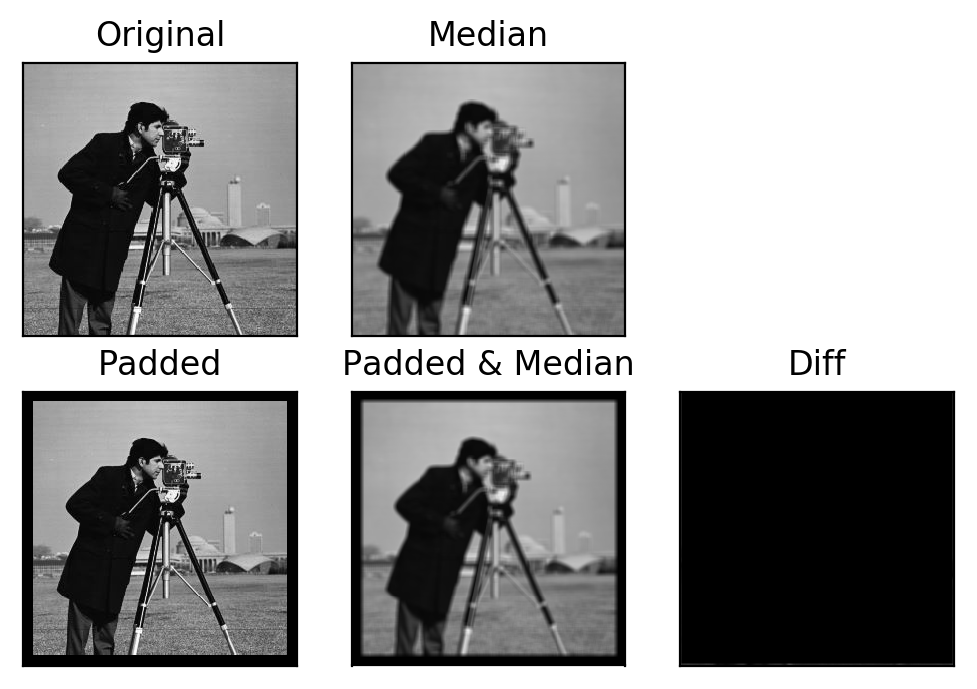

In [4]:
# Load image
img = cv2.imread("../data/cameraman.png")

# Add border and fill with zeroes. Here with the color 'black'
borderSize = 10
paddedImage = cv2.copyMakeBorder(img, top=borderSize, bottom=borderSize, left=borderSize, right=borderSize, borderType= cv2.BORDER_CONSTANT, value=[0,0,0] )

# Generate Median-Kernel
dimension = 5
kernel = np.ones((dimension, dimension)) * (1 / (dimension * dimension))

# Filtering image
filteredImage = cv2.filter2D(img, -1, kernel)
filteredPaddedImage = cv2.filter2D(paddedImage, -1, kernel)

# Median-Result-Difference between the original and the padded image => Shoud be black
diff = cv2.absdiff(filteredImage, filteredPaddedImage[borderSize:256 + borderSize,borderSize:256 + borderSize])

# Show result
subplot(2, 3, 1)
imshow(img)
set_cmap('gray')
title('Original')
xticks([])
yticks([])

subplot(2, 3, 2)
imshow(filteredImage)
set_cmap('gray')
title('Median')
xticks([])
yticks([])

subplot(2, 3, 4)
imshow(paddedImage)
set_cmap('gray')
title('Padded')
xticks([])
yticks([])

subplot(2, 3, 5)
imshow(filteredPaddedImage)
set_cmap('gray')
title('Padded & Median')
xticks([])
yticks([])

subplot(2, 3, 6)
imshow(diff),
set_cmap('gray')
title('Diff')
xticks([])
yticks([])

show()

# Aufgabe 3: Laplace-Filter

Schärfen Sie das Bild lena.tif (auf ILIAS) mit Hilfe des Laplace-Filters. Diese Operation wird heutzutage auf den meisten modernen Kameras automatisch durchgeführt.

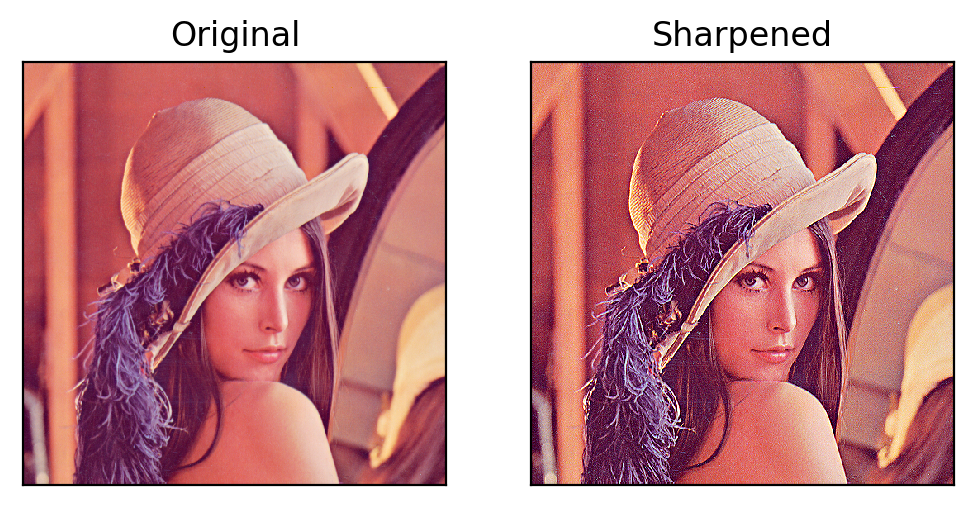

In [5]:
# Load image
img = cv2.imread("../data/lena_std.tif")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Generating Kernels
kernel = np.array(
    [[ 0, -1,  0],
     [-1,  5, -1],
     [ 0, -1,  0]
])

# Filtering image
img_sharpened = cv2.filter2D(img, -1, kernel)

# Show result
subplot(1, 2, 1)
title("Original")
imshow(img)
xticks([])
yticks([])

subplot(1, 2, 2)
title("Sharpened")
imshow(img_sharpened)
xticks([])
yticks([])

show()

# Aufgabe 4: Betrag des Gradienten


Führen Sie mit dem Bild `Zebra.png` die gleichen Operationen durch wie in der nachfolgenden Bildserie gezeigt. Schreiben Sie alle MATLAB/Octave/Python-Befehle auf und vergleichen Ihr Resultat mit der hier gezeigten Bildserie!

![Zebra.png](../data/Zebra.png)

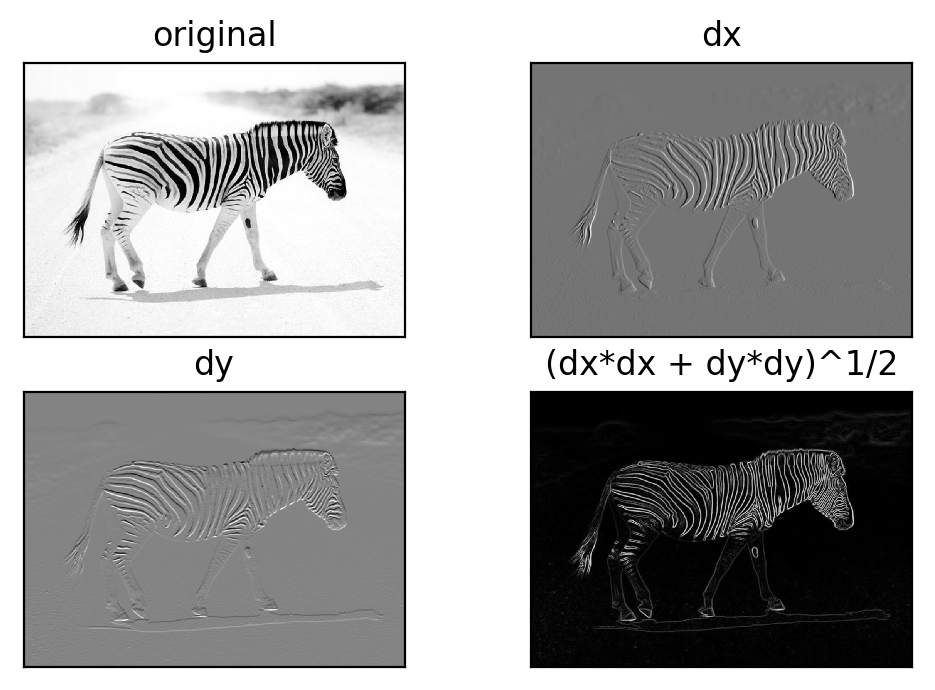

In [6]:
# Load image
img = cv2.imread("../data/Zebra.png", 0)

# Generating Kernels (Sobel)
sobel_x = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=5)  # x
sobel_y = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=5)  # y

# Gradient
absoluteGradient = np.sqrt(np.add(np.square(sobel_x), np.square(sobel_y)))

# Show result
subplot(2, 2, 1), imshow(img, cmap = 'gray'), title('original'), xticks([]), yticks([])
subplot(2, 2, 2), imshow(sobel_x, cmap = 'gray'), title('dx'), xticks([]), yticks([])
subplot(2, 2, 3), imshow(sobel_y, cmap = 'gray'), title('dy'), xticks([]), yticks([])
subplot(2, 2, 4), imshow(absoluteGradient, cmap = 'gray'), title('(dx*dx + dy*dy)^1/2'), xticks([]), yticks([])

show()

# Aufgabe 5: Gauss- und Laplacepyramide

Erstellen Sie vom Bild der Lena (lena.tif) die Gauss- und die Laplacepyramide. Verwenden Sie dazu die auf ILIAS bereitgestellten MATLAB/Octave-files. Stellen Sie ihr Resultat in der hier gezeigten Form dar.
Kontrollieren Sie dann mit den in MATLAB vorhandenen Befehlen impyramid und imresize ihr Resultat. Siehe auch https://ch.mathworks.com/help/images/ref/impyramid.html

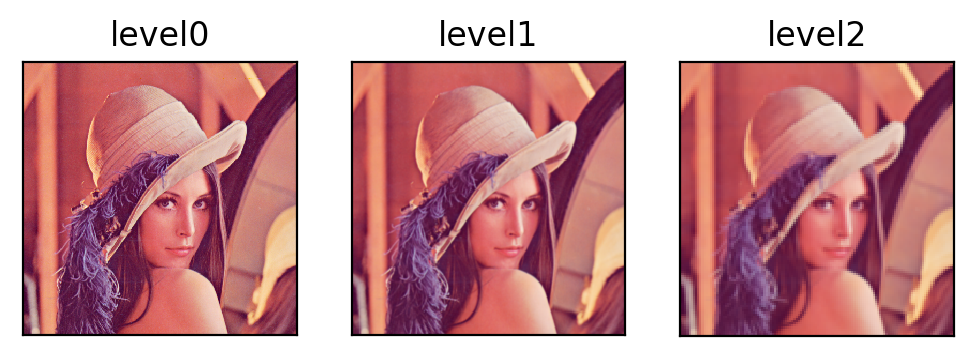

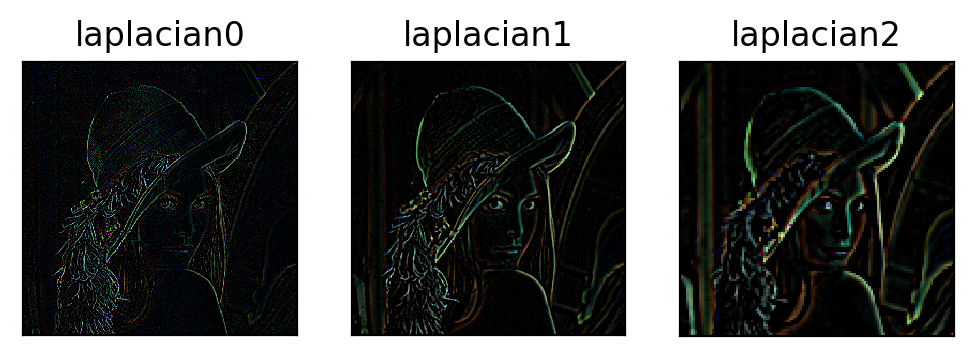

In [7]:
# Load image
img = cv2.imread('../data/lena_std.tif')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# reduce level
level0 = img
level1 = cv2.pyrDown(level0)
level2 = cv2.pyrDown(level1)
level3 = cv2.pyrDown(level2)

subplot(1, 3, 1), imshow(level0), title('level0'), xticks([]), yticks([])
subplot(1, 3, 2), imshow(level1), title('level1'), xticks([]), yticks([])
subplot(1, 3, 3), imshow(level2), title('level2'), xticks([]), yticks([])
show()

# laplacian
laplacian0 = cv2.subtract(level0, cv2.pyrUp(level1))
laplacian1 = cv2.subtract(level1, cv2.pyrUp(level2))
laplacian2 = cv2.subtract(level2, cv2.pyrUp(level3))

subplot(1, 3, 1), imshow(4 * laplacian0), title('laplacian0'), xticks([]), yticks([])
subplot(1, 3, 2), imshow(4 * laplacian1), title('laplacian1'), xticks([]), yticks([])
subplot(1, 3, 3), imshow(4 * laplacian2), title('laplacian2'), xticks([]), yticks([])
show()

The level 0 image can now be reconstructed using the lower resolution image and the laplacian:

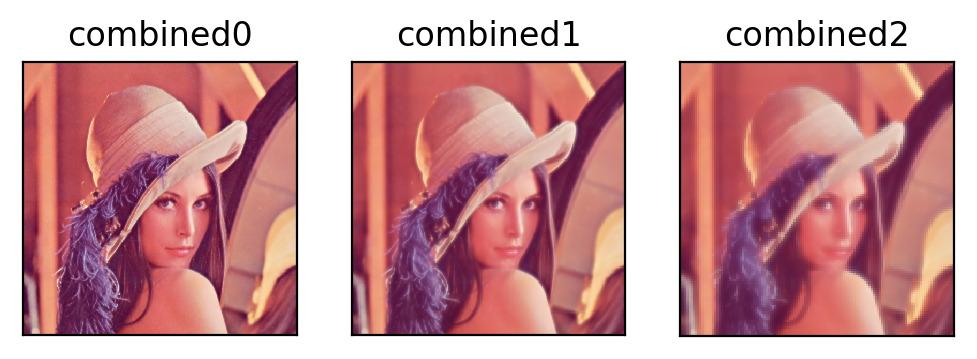

In [8]:
# reconstructed 
combined2 = cv2.add(laplacian2, cv2.pyrUp(level3))
combined1 = cv2.add(laplacian1, cv2.pyrUp(level2))
combined0 = cv2.add(laplacian0, cv2.pyrUp(level1))

subplot(1, 3, 1), imshow(combined0), title('combined0'), xticks([]), yticks([])
subplot(1, 3, 2), imshow(combined1), title('combined1'), xticks([]), yticks([])
subplot(1, 3, 3), imshow(combined2), title('combined2'), xticks([]), yticks([])
show()